In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from ley_ohm import graficar_ley_ohm
from vm_vf import vmult_vs_vfuente
from resistenciaMult import resistencia_mult

Pendiente (ajuste lineal): 1.007
Ordenada al origen: -0.063


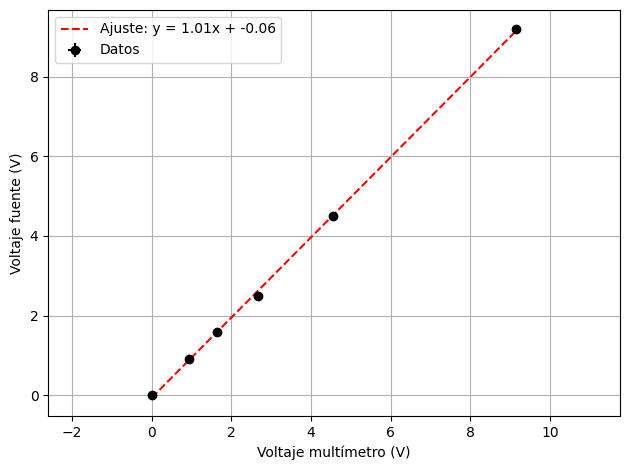

In [26]:
df_volts = pd.read_csv('../datasets/medicionesV.csv')
m, b = vmult_vs_vfuente(df_volts)

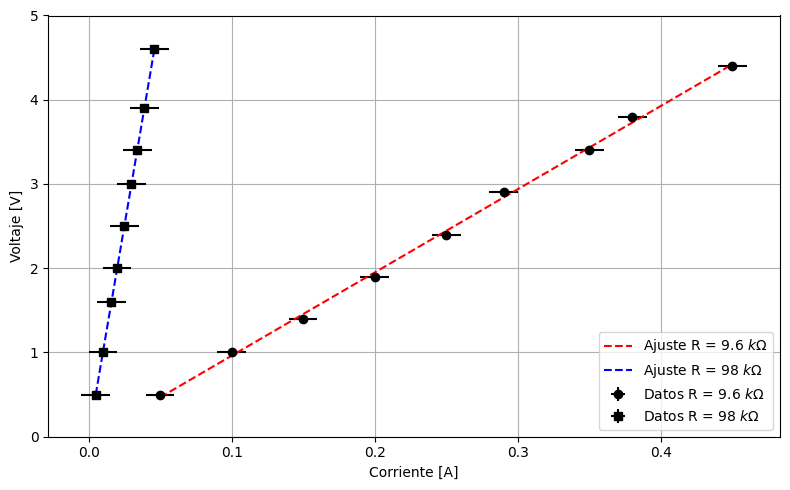

In [27]:
# Datasets
df_9600 = pd.read_csv('../datasets/mediciones1.csv')
df_98000 = pd.read_csv('../datasets/mediciones2.csv')
graficar_ley_ohm(df_9600, df_98000,v_col='V multímetro (V)', i_col='I real (A)')

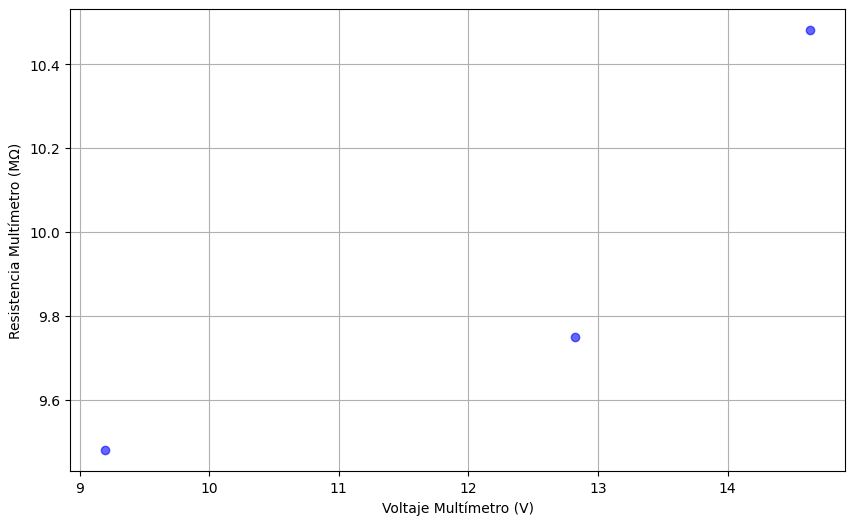

In [28]:
df_ej2 = pd.read_csv('../datasets/mediciones3.csv')
df_ej2 = df_ej2[df_ej2['R'] == 990000]

resistencia_mult(df_ej2, m, b)

In [29]:

# Columna 1,R,V multímetro,I teo mult,V fuente,R multímetro
# med7,990000,8.33,,9.2,9478966
# med8,990000,11.62,,12.8,9748983
# med9,990000,13.34,,14.6,10481429

# x = e0/vv -1
import numpy as np
R = 990000


e0 = np.array([9.2, 12.8, 14.6])
error_e0 = np.array([0.1, 0.1, 0.1])
vv = np.array([8.33, 11.62, 13.34])
error_vv = np.array([0.1, 0.1, 0.1])
x = []
for i in range(len(e0)):
    x.append((e0[i] / vv[i]) - 1)
x = np.array(x)

error_x = np.sqrt((1/vv * error_e0)**2 + ((e0 / vv**2) * error_vv)**2)

#rv = R/x
error_rv = (R / x**2) * error_x
R_v = np.array([9478966, 9748983, 10481429])





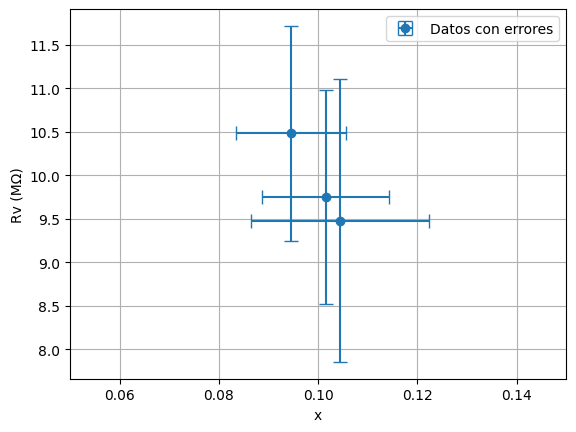

In [30]:
# Rv vs x
import matplotlib.pyplot as plt
plt.errorbar(x, R_v/1000000, xerr=error_x, yerr=error_rv/1000000, fmt='o', capsize=5, label='Datos con errores')
plt.xlabel('x')
plt.ylabel('Rv (MΩ)')
# plt.title('Resistencia del voltímetro vs x')
plt.grid(True)
plt.legend()

plt.xlim(0.05, 0.15)
plt.show()